In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import os
import warnings
import random
import joblib

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)

In [73]:
df = pd.read_csv('nepal_homes_all_listings.csv')
df.head()

,ROAD ACCESS,FACING,FLOOR,PARKING,BEDROOM,BATHROOM,FURNISH STATUS,Price,Location,LAND AREA,BUILT YEAR,BUILTUP AREA,Living,Kitchen
0,13 Feet,East,2.5,2 Cars & 3 Bikes,6,5,Semi-Furnished,Rs. 4.5Cr,"Ganesh Chowk, Kathmandu",NaN,NaN,NaN,1,NaN
1,26 Feet,North,2.5,3 Cars & 5 Bikes,6,5,Semi-Furnished,Rs. 13Cr,"Pasikot, Kathmandu",NaN,NaN,NaN,1,1
2,16 Feet,NaN,2.5,4 Cars & 9 Bikes,4,5,Semi-Furnished,Rs. 15Cr,"Pasikot, Kathmandu",NaN,NaN,NaN,1,NaN
3,13 Feet,East,3.0,1 Car & 2 Bikes,5,4,Semi-Furnished,Rs. 2.9Cr,"Ochu Height, Lalitpur",3.1 aana,2025 AD,NaN,NaN,1
4,13 Feet,NaN,2.0,1 Car & 2 Bikes,5,4,Semi-Furnished,Rs. 2.5Cr,"Imadol, Lalitpur",NaN,2024 AD,NaN,2,NaN


In [4]:
df['ROAD ACCESS'] = df['ROAD ACCESS'].str.extract(r'(\d+\.?\d*)')


df['ROAD ACCESS'] = df['ROAD ACCESS'].astype(float)
df["ROAD ACCESS"] = df['ROAD ACCESS'].fillna(random.choice(df['ROAD ACCESS']))
df['ROAD ACCESS'].isnull().sum()

np.int64(0)

In [5]:
df["FACING"] = df['FACING'].fillna("N/A")
df['FACING'].isnull().sum()

np.int64(0)

In [6]:
df['PARKING'] = df['PARKING'].str.extract(r'(\d+\.?\d*)')
df

,ROAD ACCESS,FACING,FLOOR,PARKING,BEDROOM,BATHROOM,FURNISH STATUS,Price,Location,LAND AREA,BUILT YEAR,BUILTUP AREA,Living,Kitchen
0,13.0,East,2.5,2,6,5,Semi-Furnished,Rs. 4.5Cr,"Ganesh Chowk, Kathmandu",NaN,NaN,NaN,1,NaN
1,26.0,North,2.5,3,6,5,Semi-Furnished,Rs. 13Cr,"Pasikot, Kathmandu",NaN,NaN,NaN,1,1
2,16.0,N/A,2.5,4,4,5,Semi-Furnished,Rs. 15Cr,"Pasikot, Kathmandu",NaN,NaN,NaN,1,NaN
3,13.0,East,3.0,1,5,4,Semi-Furnished,Rs. 2.9Cr,"Ochu Height, Lalitpur",3.1 aana,2025 AD,NaN,NaN,1
4,13.0,N/A,2.0,1,5,4,Semi-Furnished,Rs. 2.5Cr,"Imadol, Lalitpur",NaN,2024 AD,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,25.0,N/A,NaN,NaN,8+,3,NaN,"2,80,00,000","Harisiddhi 28 HarisiddhiLalitpur, State 3",3 aana 1 paisa,NaN,NaN,14,NaN
4568,20.0,N/A,NaN,3,8+,5+,NaN,"3,20,00,000","Banasthali 01 NagarjunKathmandu, State 3",4.2,NaN,NaN,14,NaN
4569,12.0,N/A,NaN,2,8+,5+,NaN,"4,00,00,000",NaN,8 aana,NaN,NaN,1,NaN
4570,13.0,N/A,NaN,1,5,5+,NaN,"2,75,00,000",NaN,4aana,NaN,NaN,2,3


In [7]:
df['PARKING'] = df['PARKING'].fillna(1)

In [8]:
df['PARKING'].replace('', np.nan, inplace=True)
df['PARKING'].isnull().sum()

np.int64(0)

In [9]:
df['BEDROOM'] = df['BEDROOM'].str.replace(r'\+|-', '', regex=True).astype(float)

In [10]:
df['BATHROOM'] = df['BATHROOM'].str.replace(r'\+|-', '', regex = True).astype(float)

In [11]:
df

,ROAD ACCESS,FACING,FLOOR,PARKING,BEDROOM,BATHROOM,FURNISH STATUS,Price,Location,LAND AREA,BUILT YEAR,BUILTUP AREA,Living,Kitchen
0,13.0,East,2.5,2,6.0,5.0,Semi-Furnished,Rs. 4.5Cr,"Ganesh Chowk, Kathmandu",NaN,NaN,NaN,1,NaN
1,26.0,North,2.5,3,6.0,5.0,Semi-Furnished,Rs. 13Cr,"Pasikot, Kathmandu",NaN,NaN,NaN,1,1
2,16.0,N/A,2.5,4,4.0,5.0,Semi-Furnished,Rs. 15Cr,"Pasikot, Kathmandu",NaN,NaN,NaN,1,NaN
3,13.0,East,3.0,1,5.0,4.0,Semi-Furnished,Rs. 2.9Cr,"Ochu Height, Lalitpur",3.1 aana,2025 AD,NaN,NaN,1
4,13.0,N/A,2.0,1,5.0,4.0,Semi-Furnished,Rs. 2.5Cr,"Imadol, Lalitpur",NaN,2024 AD,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,25.0,N/A,NaN,1,8.0,3.0,NaN,"2,80,00,000","Harisiddhi 28 HarisiddhiLalitpur, State 3",3 aana 1 paisa,NaN,NaN,14,NaN
4568,20.0,N/A,NaN,3,8.0,5.0,NaN,"3,20,00,000","Banasthali 01 NagarjunKathmandu, State 3",4.2,NaN,NaN,14,NaN
4569,12.0,N/A,NaN,2,8.0,5.0,NaN,"4,00,00,000",NaN,8 aana,NaN,NaN,1,NaN
4570,13.0,N/A,NaN,1,5.0,5.0,NaN,"2,75,00,000",NaN,4aana,NaN,NaN,2,3


In [12]:
df['LAND AREA'] = df['LAND AREA'].fillna(df['BUILTUP AREA'])

In [13]:
df['LAND AREA'].isnull().sum()

np.int64(1050)

In [14]:
df["LAND AREA"]= df["LAND AREA"].dropna()

In [15]:
df['LAND AREA'] = df['LAND AREA'].str.strip('()').str.split(' ')

In [16]:
def convert_to_sqm(land_area):
    if isinstance(land_area, list): 
        land_area = " ".join(map(str, land_area))  

    if not isinstance(land_area, str) or not land_area.strip():  
        return np.nan 

    
    conversion_factors = {
        "aana": 31.79,
        "paisa": 7.95,
        "dam": 1.99
    }

    total_sqm = 0

   
    land_area = re.sub(r"(\d)([a-zA-Z])", r"\1 \2", str(land_area).lower()).strip()

    
    matches = re.findall(r"([\d]+(?:\.\d+)?)\s*(aana|paisa|dam)?", land_area)

    if not matches:
        return np.nan  

    for value, unit in matches:
        try:
            value = float(value)  
            if unit in conversion_factors:
                total_sqm += value * conversion_factors[unit]  
            else:
                total_sqm += value  
        except ValueError:
            continue  

    return total_sqm if total_sqm > 30 else np.nan  


df["LAND AREA (sq m)"] = df["LAND AREA"].apply(convert_to_sqm)


print(df[["LAND AREA", "LAND AREA (sq m)"]].head())


     LAND AREA  LAND AREA (sq m)
0          NaN               NaN
1          NaN               NaN
2          NaN               NaN
3  [3.1, aana]            98.549
4          NaN               NaN


In [17]:
df['LAND AREA (sq m)']

0           NaN
1           NaN
2           NaN
3        98.549
4           NaN
         ...   
4567    103.320
4568        NaN
4569    254.320
4570    127.160
4571        NaN
Name: LAND AREA (sq m), Length: 4572, dtype: float64

In [18]:
def bhk_find(data):
    if pd.isna(data):  
        return np.nan 
    
    if data <= 30:
        return 2
    elif data <= 60:
        return 3
    elif data <= 90:
        return 4
    elif data <= 130:
        return 5
    elif data > 130:
        return 6
    else:
        return np.nan 

df["BHK"] = df["BEDROOM"]
df['BHK'] = df['BHK'].fillna(df['LAND AREA (sq m)'].apply(bhk_find))



In [19]:
df['BHK'].isnull().sum()

np.int64(100)

In [20]:
df = df.dropna(subset=['LAND AREA (sq m)'])
#df1 = df1.dropna(subset=['Price'])

In [21]:
df['BATHROOM'] = df['BATHROOM'].fillna(df.BHK +df.FLOOR)
df['BATHROOM'] = df['BATHROOM'].fillna(df.BHK +1)

/tmp/ipykernel_12013/3904060172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BATHROOM'] = df['BATHROOM'].fillna(df.BHK +df.FLOOR)
/tmp/ipykernel_12013/3904060172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BATHROOM'] = df['BATHROOM'].fillna(df.BHK +1)


In [22]:
df.isnull().sum()

ROAD ACCESS            0
FACING                 0
FLOOR                919
PARKING                0
BEDROOM              105
BATHROOM               0
FURNISH STATUS      1100
Price                  1
Location               2
LAND AREA              0
BUILT YEAR          2059
BUILTUP AREA        1535
Living               756
Kitchen              965
LAND AREA (sq m)       0
BHK                    0
dtype: int64

In [23]:
df['Location'] = df['Location'].str.strip('()').str.split(' ')
df

/tmp/ipykernel_12013/1030416729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].str.strip('()').str.split(' ')


,ROAD ACCESS,FACING,FLOOR,PARKING,BEDROOM,BATHROOM,FURNISH STATUS,Price,Location,LAND AREA,BUILT YEAR,BUILTUP AREA,Living,Kitchen,LAND AREA (sq m),BHK
3,13.0,East,3.0,1,5.0,4.0,Semi-Furnished,Rs. 2.9Cr,"[Ochu, Height,, Lalitpur]","[3.1, aana]",2025 AD,NaN,NaN,1,98.549,5.0
5,13.0,South-East,2.5,1,5.0,3.0,Semi-Furnished,Rs. 2.95Cr,"[Ochu, Height,, Lalitpur]","[3.2, aana]",2024 AD,NaN,NaN,NaN,101.728,5.0
6,4.0,N/A,2.5,1,4.0,5.0,Semi-Furnished,Rs. 3.98Cr,"[Budhanilkantha,, Kathmandu]","[4.3, aana]",NaN,NaN,NaN,2,136.697,4.0
8,20.0,East,2.5,1,5.0,4.0,Full-Furnished,Rs. 4.5Cr,"[Tikathali,, Lalitpur]","[5.2, aana]",2023 AD,1710 Sq. Ft.,NaN,2,165.308,5.0
14,16.0,East,2.5,1,4.0,3.0,Semi-Furnished,Rs. 2.1Cr,"[Lubhu,, Lalitpur]","[3.1, aana]",2024 AD,1026 Sq. Ft.,1,NaN,98.549,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,13.0,N/A,NaN,2,5.0,4.0,NaN,"3,50,00,000","[Near, Rave, Futsal, Center, , BudhanilkanthaK...","[5.5, Aana]",NaN,NaN,1,1,174.845,5.0
4566,20.0,N/A,NaN,1,1.0,1.0,NaN,"1,50,00,000","[near, New, buspark, 16, Kathmandu, Metropolis...",[10/317.90],NaN,NaN,1,NaN,327.900,1.0
4567,25.0,N/A,NaN,1,8.0,3.0,NaN,"2,80,00,000","[Harisiddhi, 28, HarisiddhiLalitpur,, , , , , ...","[3, aana, 1, paisa]",NaN,NaN,14,NaN,103.320,8.0
4569,12.0,N/A,NaN,2,8.0,5.0,NaN,"4,00,00,000",NaN,"[8, aana]",NaN,NaN,1,NaN,254.320,8.0


In [24]:
def split_capital_words(lst):
    if not isinstance(lst, list):  
        return []
    
    new_list = []
    for item in lst:
        if isinstance(item, str):  
            words = re.findall(r'[A-Z][a-z]*|\d+', item)  
            new_list.extend(words)
        else:
            new_list.append(item)  
            
    return new_list

df['Location'] = df['Location'].apply(split_capital_words)


/tmp/ipykernel_12013/3283057815.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].apply(split_capital_words)


In [25]:
def modify_list(lst):
    if isinstance(lst, list) and len(lst) == 6:  
        return lst[2:-2]  
    return lst  

df['Location'] = df['Location'].apply(modify_list)


/tmp/ipykernel_12013/1864140088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].apply(modify_list)


In [26]:
df.isnull().sum()

ROAD ACCESS            0
FACING                 0
FLOOR                919
PARKING                0
BEDROOM              105
BATHROOM               0
FURNISH STATUS      1100
Price                  1
Location               0
LAND AREA              0
BUILT YEAR          2059
BUILTUP AREA        1535
Living               756
Kitchen              965
LAND AREA (sq m)       0
BHK                    0
dtype: int64

In [27]:
df.describe()

,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,LAND AREA (sq m),BHK
count,3095.000000,2176.000000,2990.000000,3095.000000,3095.000000,3095.000000
mean,16.358805,2.747243,14.965217,6.709532,1128.569581,14.645234
std,46.114255,0.626607,86.788010,45.777898,10166.135975,85.319860
min,1.000000,1.000000,0.000000,0.000000,30.500000,0.000000
25%,13.000000,2.500000,4.000000,3.000000,103.320000,4.000000
50%,13.000000,2.500000,5.000000,4.000000,158.950000,5.000000
75%,16.000000,3.000000,6.000000,5.000000,1500.000000,6.000000
max,2000.000000,7.000000,812.000000,810.000000,533695.606400,812.000000


In [28]:
def concatenate_if_three(lst):
    if isinstance(lst, list):
        if len(lst) == 3:
            return [lst[0] + " " + lst[1], lst[2]]  
        elif len(lst) == 2:
            return lst 
        elif len(lst) == 1:
            return [np.nan, lst[0]]  
        else:
            return [np.nan, np.nan]
    return [np.nan, np.nan]

df['Location'] = df['Location'].apply(concatenate_if_three)

df[['City', 'District']] = pd.DataFrame(df['Location'].tolist(), index=df.index)

/tmp/ipykernel_12013/1686435365.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].apply(concatenate_if_three)
/tmp/ipykernel_12013/1686435365.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['City', 'District']] = pd.DataFrame(df['Location'].tolist(), index=df.index)
/tmp/ipykernel_12013/1686435365.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [29]:
df['District'].unique()

array(['Lalitpur', 'Kathmandu', 'Makwanpur', 'Bhaktapur', 'Palpa',
       'Kaski', 'Rupandehi', 'Morang', 'Kavrepalanchok', 'Tanahun',
       'Dhanusa', 'Sunsari', 'Metropolis', nan, 'Mahalaxmi',
       'Municipality', 'Budhanilkantha', 'Tarakeshwor', 'Bagmati',
       'Manohara', 'Thimi', 'Manohora', 'Simara', 'Dolakha',
       'Banepakavrepalanchok', 'Rupande', 'Chitwan', 'Sindhuli', 'Banepa',
       'Lamjung'], dtype=object)

In [30]:
df['City'].unique()

array(['Ochu Height', 'Budhanilkantha', 'Tikathali', 'Lubhu',
       'Shital Height', 'Changathali', 'Sitapakha', 'Maharajgunj',
       'Chyasundole', 'Imadol', 'Kapan', 'Hepali Height', 'Nakhipot',
       'Bhaisepati', 'Gongabu', 'Baluwatar', 'Boshigaun', 'Mid Baneshwor',
       'Harisiddhi', 'Thali', 'Bojepokhari', 'Sunakothi', 'Sanagaun',
       'Lamatar', 'Tinthana', 'Pepsicola', 'Satdobato', 'Bhangal',
       'Dhalmal', 'Kupandole', 'Mandikhatar', 'Ganesh Chowk',
       'Dhumbarahi', 'Grande Hospital', 'Kirtipur', 'Pasikot',
       'Aani Gumba', 'Chandragiri', 'Hattiban', 'Bhandari Marg',
       'Hetauda', 'Hattigaunda', 'Bhaktapur', 'Sinamangal', 'Jhaukhel',
       'Shantinagar', 'Aakasedhara', 'Dhapakhel', 'Samakhusi',
       'Suryabinayak', 'Nakkhu', 'Bafal', 'Buddhanagar', 'Jyotinagar',
       'Manamaiju', 'Anamnagar', 'Basundhara', 'Chhetrapati', 'Kalanki',
       'Jawalakhel', 'Bansbari', 'Baluwakhani', 'Gothatar', 'Thamel',
       'Narayanthan', 'Badikhel', 'Sanepa', 'Maitr

In [31]:
df.drop(['FLOOR', 'BEDROOM', 
                'FURNISH STATUS', 'LAND AREA', 'BUILT YEAR', 'BUILTUP AREA',  'Kitchen'],axis = 1, inplace=True)

/tmp/ipykernel_12013/2016960390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['FLOOR', 'BEDROOM',


In [32]:
df["Location"] = df["City"] + ", " + df["District"]

/tmp/ipykernel_12013/174205200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"] = df["City"] + ", " + df["District"]


In [33]:
df["Location"] = df["Location"].fillna(random.choice(df["District"].dropna().tolist()))

/tmp/ipykernel_12013/2468427059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"] = df["Location"].fillna(random.choice(df["District"].dropna().tolist()))


In [34]:
df = df.drop(columns=['Living ', 'City','District'])

In [35]:
df['Price'].unique

<bound method Series.unique of 3         Rs. 2.9Cr
5        Rs. 2.95Cr
6        Rs. 3.98Cr
8         Rs. 4.5Cr
14        Rs. 2.1Cr
           ...     
4565    3,50,00,000
4566    1,50,00,000
4567    2,80,00,000
4569    4,00,00,000
4570    2,75,00,000
Name: Price, Length: 3095, dtype: object>

In [36]:
def strrem(x):
    if isinstance(x, str):
        num = re.findall(r'\d+\.?\d*', x.replace(',', ''))
        if num:
            value = float(num[0])
            return value if value < 100 else value / 1e7  
        else:
            return None
    elif isinstance(x, (int, float)):
        return x if x < 100 else x / 1e7
    else:
        return None


df['Price'] = df['Price'].apply(strrem)

df['Price']


3       2.90
5       2.95
6       3.98
8       4.50
14      2.10
        ... 
4565    3.50
4566    1.50
4567    2.80
4569    4.00
4570    2.75
Name: Price, Length: 3095, dtype: float64

In [37]:
X_data = df.drop(columns=["FACING", "Price", "Location"])
df


,ROAD ACCESS,FACING,PARKING,BATHROOM,Price,Location,LAND AREA (sq m),BHK
3,13.0,East,1,4.0,2.90,"Ochu Height, Lalitpur",98.549,5.0
5,13.0,South-East,1,3.0,2.95,"Ochu Height, Lalitpur",101.728,5.0
6,4.0,N/A,1,5.0,3.98,"Budhanilkantha, Kathmandu",136.697,4.0
8,20.0,East,1,4.0,4.50,"Tikathali, Lalitpur",165.308,5.0
14,16.0,East,1,3.0,2.10,"Lubhu, Lalitpur",98.549,4.0
...,...,...,...,...,...,...,...,...
4565,13.0,N/A,2,4.0,3.50,Lalitpur,174.845,5.0
4566,20.0,N/A,1,1.0,1.50,Lalitpur,327.900,1.0
4567,25.0,N/A,1,3.0,2.80,"Harisiddhi, Lalitpur",103.320,8.0
4569,12.0,N/A,2,5.0,4.00,Lalitpur,254.320,8.0


In [38]:
dfprice = df.dropna(subset=["Price"])
X1 = dfprice[['LAND AREA (sq m)','BHK']]
y1 = dfprice["Price"]


In [39]:
X1.isnull().sum()

LAND AREA (sq m)    0
BHK                 0
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.33, random_state=42)


In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [42]:
y1_pred = model.predict(X1_test) 

In [43]:
X_data =  df[['LAND AREA (sq m)','BHK']]


In [44]:
y_pricedata =  model.predict(X_data)

In [45]:

y_pricedata_series = pd.Series(y_pricedata, index=df.index)
df['Price'] = df['Price'].fillna(y_pricedata_series)

In [75]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_shape = df.shape[0]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered



print("Outliers removed. New dataset size:", df.shape)


Outliers removed. New dataset size: (4572, 14)


In [47]:
df.describe()

,ROAD ACCESS,BATHROOM,Price,LAND AREA (sq m),BHK
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,14.638137,3.860669,3.063131,709.260903,5.212182
std,2.824487,1.332472,1.328341,948.067402,1.481320
min,9.000000,1.000000,0.000000,30.500000,1.000000
25%,13.000000,3.000000,2.300000,101.728000,4.000000
50%,13.000000,4.000000,3.000000,133.518000,5.000000
75%,16.000000,5.000000,3.831586,1200.000000,6.000000
max,20.000000,8.000000,6.800000,3550.000000,9.000000


In [48]:
df['Price'].unique()

array([2.90000000e+00, 2.95000000e+00, 4.50000000e+00, 2.10000000e+00,
       2.60000000e+00, 2.40000000e+00, 3.25000000e+00, 3.00000000e+00,
       2.80000000e+00, 5.25000000e+00, 4.25000000e+00, 5.20000000e+00,
       4.60000000e+00, 2.50000000e+00, 2.20000000e+00, 6.50000000e+00,
       4.35000000e+00, 3.75000000e+00, 1.60000000e+00, 3.30000000e+00,
       3.20000000e+00, 3.40000000e+00, 2.30000000e+00, 3.90000000e+00,
       1.80000000e+00, 2.75000000e+00, 4.80000000e+00, 3.50000000e+00,
       1.95000000e+00, 1.30000000e+00, 3.65000000e+00, 2.45000000e+00,
       4.20000000e+00, 2.25000000e+00, 6.60000000e+00, 3.70000000e+00,
       3.70075601e+00, 8.00000000e-03, 1.99000000e+00, 4.40000000e+00,
       3.10000000e+00, 3.69686872e+00, 1.50000000e+00, 2.98000000e+00,
       3.70030631e+00, 3.05000000e+00, 2.65000000e+00, 6.00000000e+00,
       4.06381238e+00, 5.75000000e+00, 3.85000000e+00, 3.80000000e+00,
       4.06247001e+00, 4.75000000e+00, 4.10000000e+00, 4.55000000e+00,
      

Text(0.5, 1.0, 'Land area in sq m vs Price')

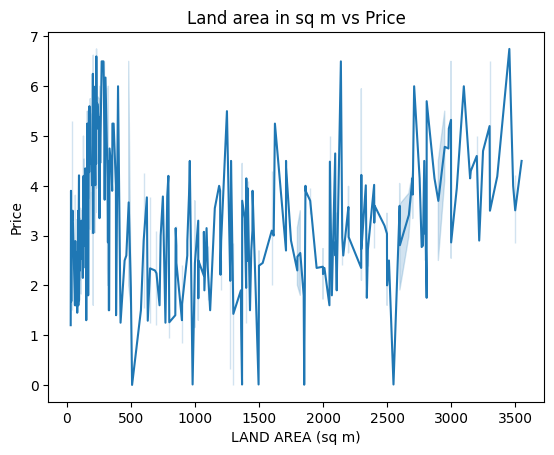

In [49]:
sns.lineplot(data=df, x="LAND AREA (sq m)", y="Price")
plt.title("Land area in sq m vs Price")

In [50]:
df.isnull().sum()

ROAD ACCESS         0
FACING              0
PARKING             0
BATHROOM            0
Price               0
Location            0
LAND AREA (sq m)    0
BHK                 0
dtype: int64

Text(0.5, 1.0, 'BHK vs Price')

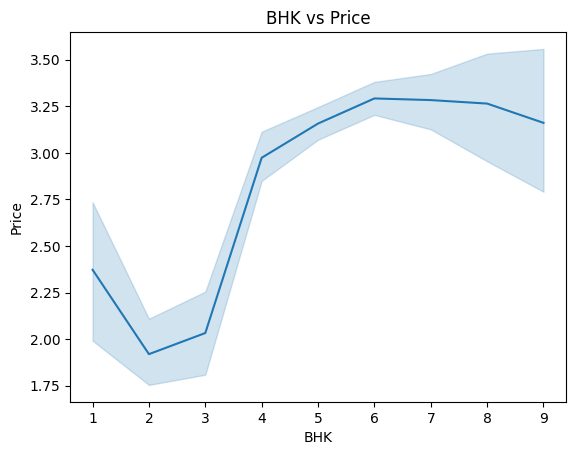

In [51]:
sns.lineplot(data=df, x="BHK", y="Price")
plt.title("BHK vs Price")

In [52]:
df["log_sqft"] = np.log1p(df["LAND AREA (sq m)"])


In [53]:
X = df[["ROAD ACCESS", "FACING", "PARKING", "BATHROOM", "Location", "LAND AREA (sq m)", "BHK"]]
y = df["Price"]
X = pd.get_dummies(X, columns=["FACING", "Location"], drop_first=True)
train_columns = X.columns

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_absolute_error')

In [67]:
y3_pred = grid_search.predict(X_test)
y3_pred

array([3.33928711, 2.05363784, 1.30247624, 4.86660502, 2.97190325,
       2.41477839, 3.03856445, 2.83730928, 3.60342759, 3.90333822,
       4.65100877, 3.765103  , 3.17379357, 4.00721326, 3.78449483,
       3.53567496, 2.64193859, 3.95282748, 2.59499663, 3.67128162,
       3.51117919, 2.50571283, 3.21648708, 2.63256871, 2.47222392,
       2.600519  , 3.20929991, 2.8190332 , 2.66599602, 2.26940989,
       3.11217609, 3.60444763, 3.08508434, 4.18064181, 1.55737837,
       1.3164562 , 3.70710299, 2.59342232, 2.25674377, 2.95456521,
       3.00799102, 2.04423661, 2.85784808, 2.05037574, 3.48442369,
       3.88951573, 4.44403241, 2.71980965, 3.94269741, 3.44918747,
       3.31191682, 2.85097307, 2.99264603, 4.07716016, 3.01639347,
       4.88277515, 2.17698884, 4.54203236, 1.43591167, 3.78300823,
       2.3137257 , 2.7726257 , 2.24391325, 1.95877352, 2.8518491 ,
       2.48411438, 2.81937566, 2.99977983, 2.09036232, 3.31203764,
       2.24915097, 1.78891515, 2.72370257, 3.14079437, 3.25236

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y3_pred)
print(f"Mean Absolute Error: {mae}")
print("Mean Squared Error:", mean_squared_error(y_test, y3_pred))
print("R2 Score:", r2_score(y_test, y3_pred))

Mean Absolute Error: 0.7653564060072167
Mean Squared Error: 1.110347016665661
R2 Score: 0.3716937515381251


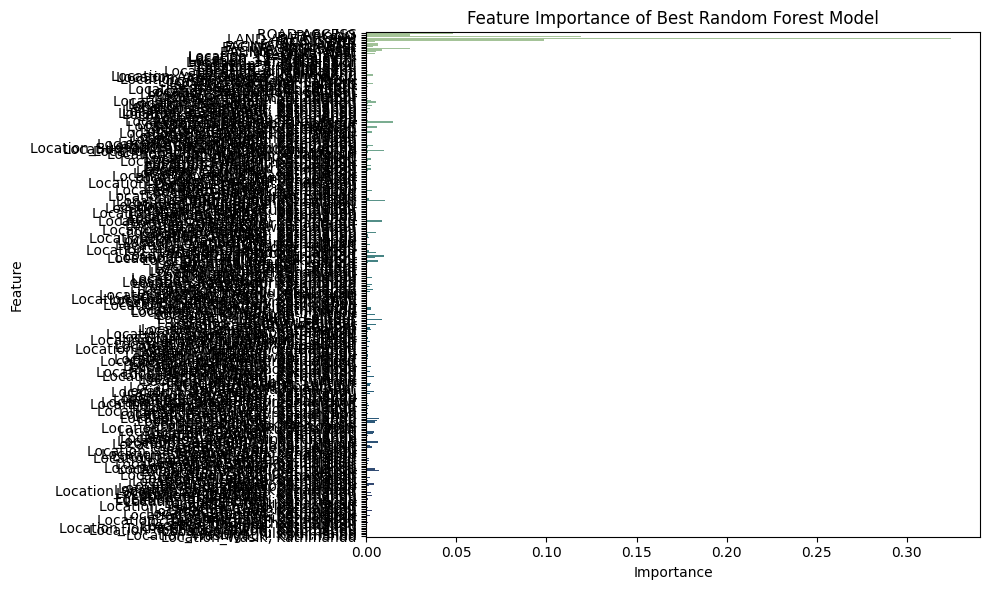

In [72]:
# If your data was preprocessed with get_dummies, make sure to pass those column names here
best_model = grid_search.best_estimator_
feat_importances = pd.Series(best_model.feature_importances_, index=train_columns)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index, palette="crest")
plt.title("Feature Importance of Best Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


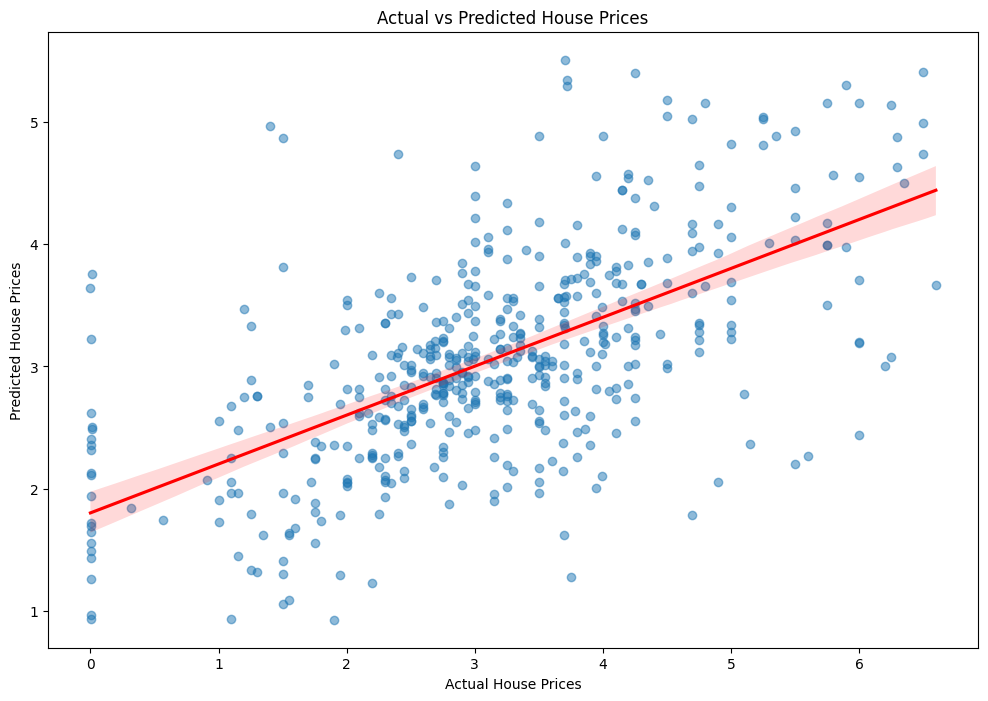

In [69]:
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=y3_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [59]:
def prepare_input(location, facing, parking, sqft, bath, bhk, road_access):
    input_dict = {
        "ROAD ACCESS": road_access,
        "FACING": facing,
        "PARKING": parking,
        "BATHROOM": bath,
        "Location": location,
        "LAND AREA (sq m)": sqft,
        "BHK": bhk,
    }
    input_df = pd.DataFrame([input_dict])
    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=train_columns, fill_value=0)

    return input_encoded

def predict_price(location, facing, parking, sqft, bath, bhk, road_access):
    input_df = prepare_input(location, facing, parking, sqft, bath, bhk, road_access)
    price = grid_search.predict(input_df)[0]
    return price


print()


In [66]:
price = predict_price("Lalitpur", "South", 15, 700, 8, 3, 2)
print("Predicted price Rs:", price,"Cr")


Predicted price Rs: 1.8727935085531437 Cr


In [61]:

joblib.dump(grid_search.best_estimator_, 'property_price_model.pkl')
joblib.dump(train_columns, 'train_columns.pkl')



['train_columns.pkl']

In [64]:
df["Price"].describe()


count    2512.000000
mean        3.063131
std         1.328341
min         0.000000
25%         2.300000
50%         3.000000
75%         3.831586
max         6.800000
Name: Price, dtype: float64

In [65]:
import json


loc = df["Location"].unique().tolist()

# Save to JSON
with open("locations.json", "w") as f:
    json.dump(loc, f)

In [63]:
df['FACING'].unique()


array(['East', 'South-East', 'West', 'South', 'North', 'North-East',
       'South-West', 'N/A', 'North-West'], dtype=object)